<a href="https://colab.research.google.com/github/Charithareddy22/charithareddy/blob/main/toyoto_corrola.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
import pandas as pd
from google.colab import files
uploaded  = files.upload()
file_name = list(uploaded.keys())[0]
toyoto = pd.read_csv(file_name)

Saving Toyoto_Corrola.csv to Toyoto_Corrola.csv


In [3]:
toyoto.shape

(1436, 10)

In [4]:
toyoto.isnull().sum()

,0
Id,0
Model,0
Price,0
Age_08_04,0
KM,0
HP,0
Doors,0
Cylinders,0
Gears,0
Weight,0


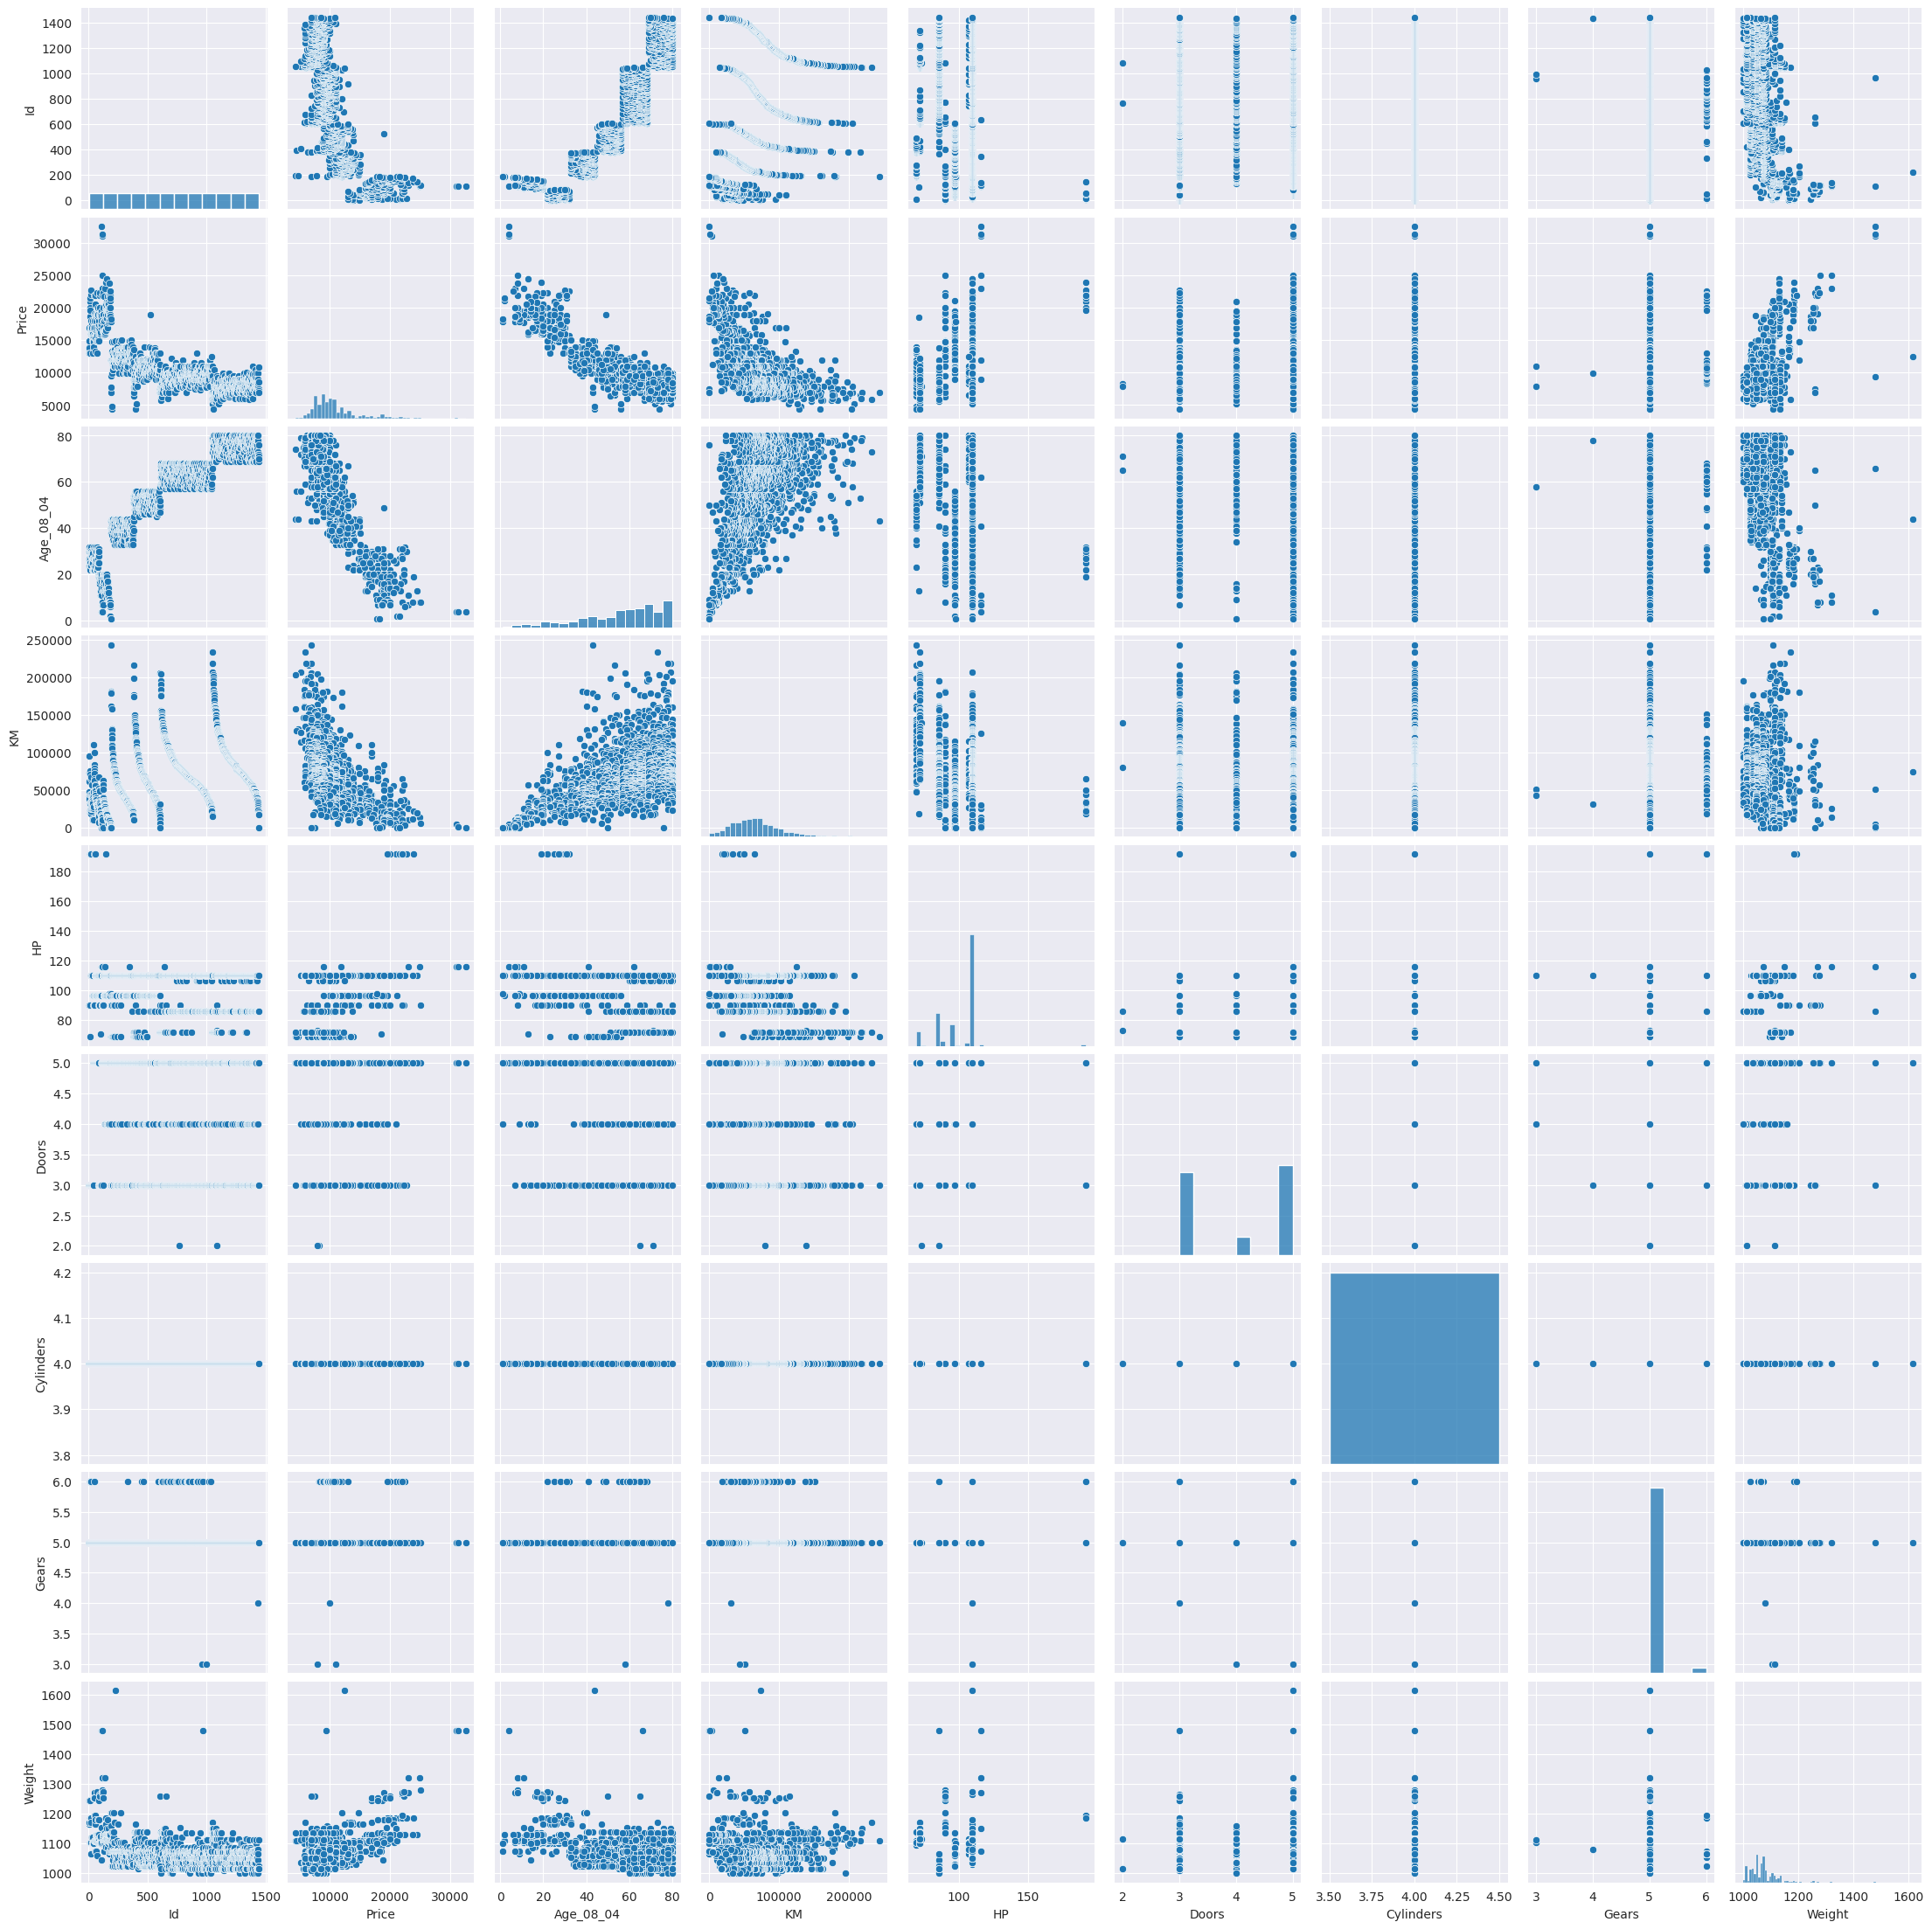

In [5]:
sns.set_style(style='darkgrid')
sns.pairplot(toyoto)

In [6]:
print(toyoto.columns)

Index(['Id', 'Model', 'Price', 'Age_08_04', 'KM', 'HP', 'Doors', 'Cylinders',
       'Gears', 'Weight'],
      dtype='object')


In [7]:
import statsmodels.formula.api as smf
model = smf.ols('Price~ KM + HP + Gears + Weight',data = toyoto).fit()

In [8]:
model.params

,0
Intercept,-33108.190773
KM,-0.051058
HP,19.346789
Gears,823.344168
Weight,38.449870


In [9]:
print(model.tvalues, '\n', model.pvalues)


Intercept   -17.605309
KM          -31.835540
HP            4.695940
Gears         2.676241
Weight       35.700191
dtype: float64 
 Intercept     5.963786e-63
KM           1.332838e-168
HP            2.908442e-06
Gears         7.530299e-03
Weight       3.747848e-200
dtype: float64


In [10]:
(model.rsquared,model.rsquared_adj)

(0.6531449815011297, 0.6521754356772335)

In [11]:
ml_v = smf.ols('Price~KM',data = toyoto).fit()
print(ml_v.tvalues,'\n',ml_v.pvalues)

Intercept    88.510378
KM          -26.267601
dtype: float64 
 Intercept     0.000000e+00
KM           1.757913e-124
dtype: float64


In [12]:
ml_w = smf.ols('Price~HP',data = toyoto).fit()
print(ml_w.tvalues,'\n',ml_w.pvalues)

Intercept     4.803134
HP           12.567862
dtype: float64 
 Intercept    1.725695e-06
HP           1.926234e-34
dtype: float64


In [13]:
ml_wv = smf.ols('Price~KM+HP',data = toyoto).fit()
print(ml_wv.tvalues,'\n',ml_wv.pvalues)

Intercept    17.060866
KM          -23.020336
HP            6.183984
dtype: float64 
 Intercept     1.468198e-59
KM           4.902715e-100
HP            8.136379e-10
dtype: float64


In [14]:
(ml_wv.rsquared,ml_wv.rsquared_adj)

(0.3424034967405156, 0.34148570678481505)

In [16]:
rsq_km = smf.ols('KM~HP+Gears+Weight',data = toyoto).fit().rsquared
vif_km = 1/(1-rsq_km)

rsq_hp = smf.ols('HP~KM+Gears+Weight',data = toyoto).fit().rsquared
vif_hp = 1/(1-rsq_hp)

rsq_gears = smf.ols('Gears~HP+Weight+KM',data = toyoto).fit().rsquared
vif_gears = 1/(1-rsq_gears)

rsq_weight = smf.ols('Weight~HP+KM+Gears',data = toyoto).fit().rsquared
vif_weight = 1/(1-rsq_weight)

d1={'Variables':['HP','KM','Gears','Weight'],'VIF':[vif_hp,vif_km,vif_gears,vif_weight]}
Vif_frame = pd.DataFrame(d1)
Vif_frame

,Variables,VIF
0,HP,1.194714
1,KM,1.134798
2,Gears,1.054844
3,Weight,1.008101


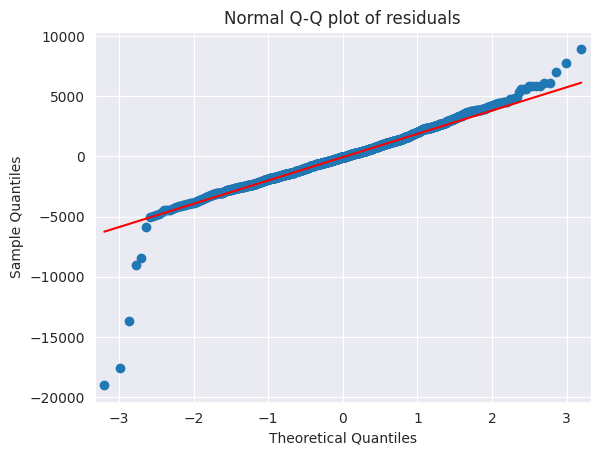

In [17]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [18]:
list(np.where(model.resid>10))

[array([   6,    7,    8,    9,   10,   11,   12,   13,   14,   15,   16,
          17,   18,   19,   20,   21,   22,   23,   24,   25,   26,   27,
          28,   29,   31,   32,   33,   34,   35,   36,   37,   38,   39,
          40,   41,   42,   43,   44,   45,   46,   47,   48,   49,   50,
          51,   52,   53,   54,   55,   56,   57,   58,   59,   60,   61,
          62,   63,   64,   65,   66,   67,   68,   69,   70,   71,   72,
          73,   74,   75,   76,   77,   78,   79,   80,   81,   82,   83,
          84,   85,   86,   87,   88,   89,   90,   91,   92,   93,   94,
          95,   96,   97,   98,   99,  100,  101,  102,  103,  104,  105,
         106,  107,  108,  109,  110,  111,  112,  113,  114,  115,  116,
         117,  118,  119,  120,  121,  122,  123,  124,  125,  126,  127,
         128,  129,  130,  131,  132,  133,  134,  135,  136,  137,  138,
         139,  140,  141,  142,  143,  144,  145,  146,  147,  148,  149,
         150,  151,  152,  153,  154, 

In [19]:
def get_standardized_values(vals):
  return (vals-vals.mean())/vals.std()

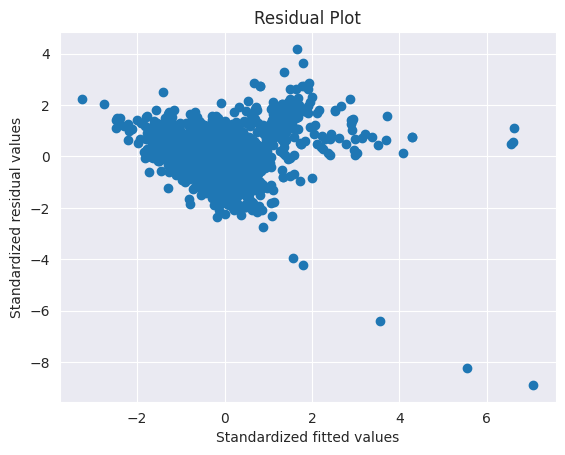

In [20]:
plt.scatter(get_standardized_values(model.fittedvalues),
          get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized fitted values')
plt.ylabel('Standardized residual values')
plt.show()

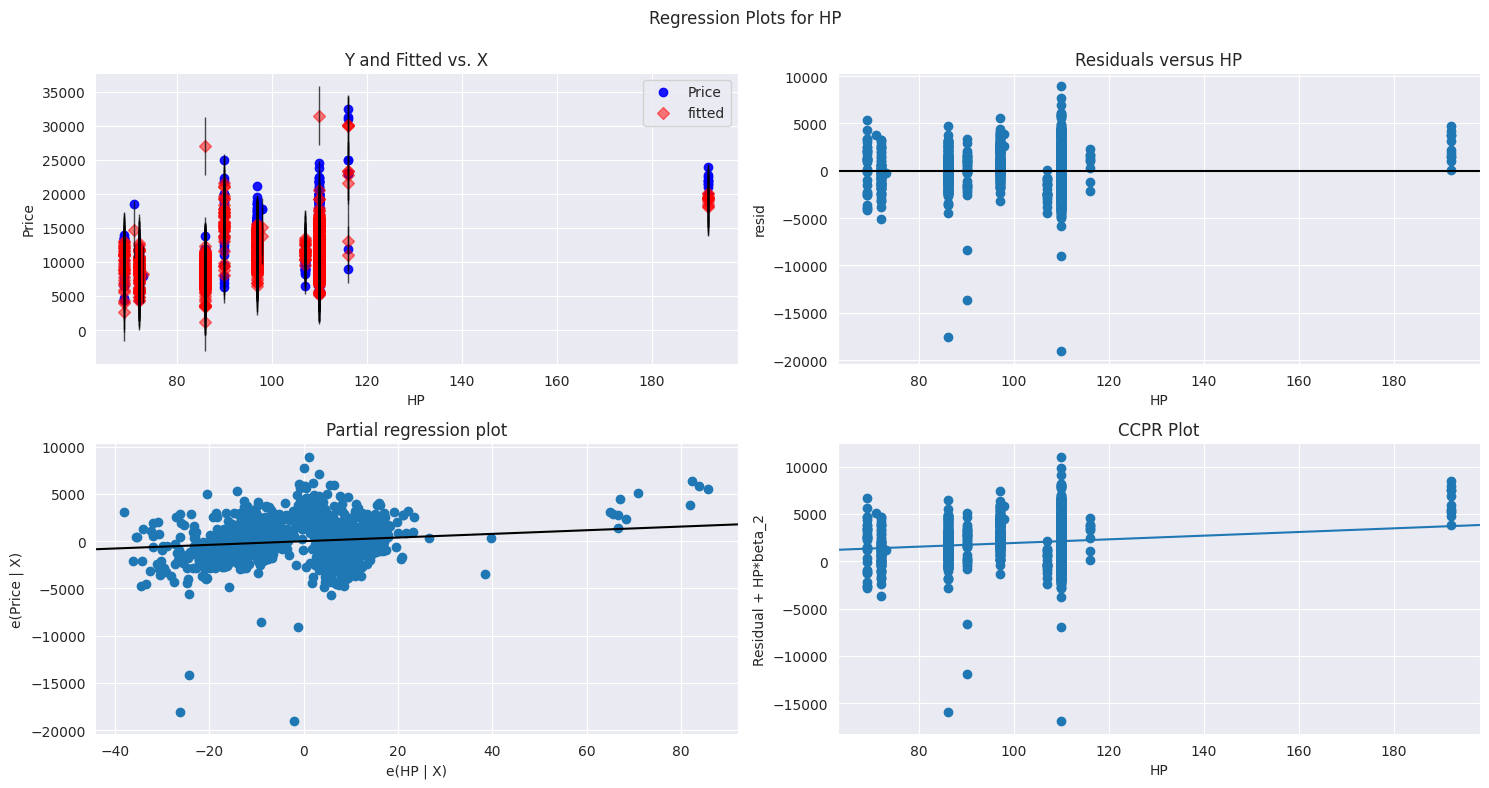

In [21]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'HP', fig=fig)
plt.show()

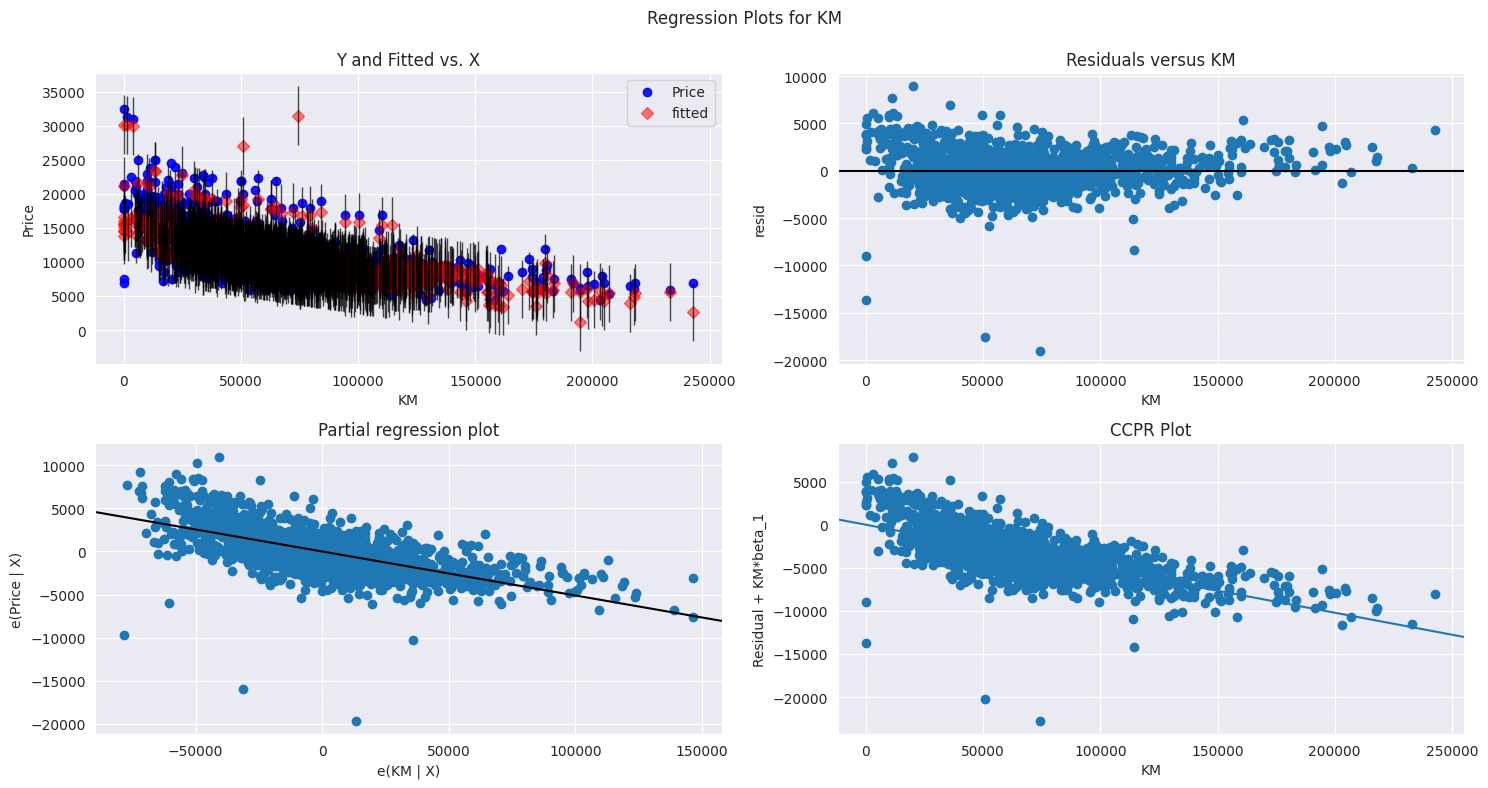

In [22]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'KM', fig=fig)
plt.show()

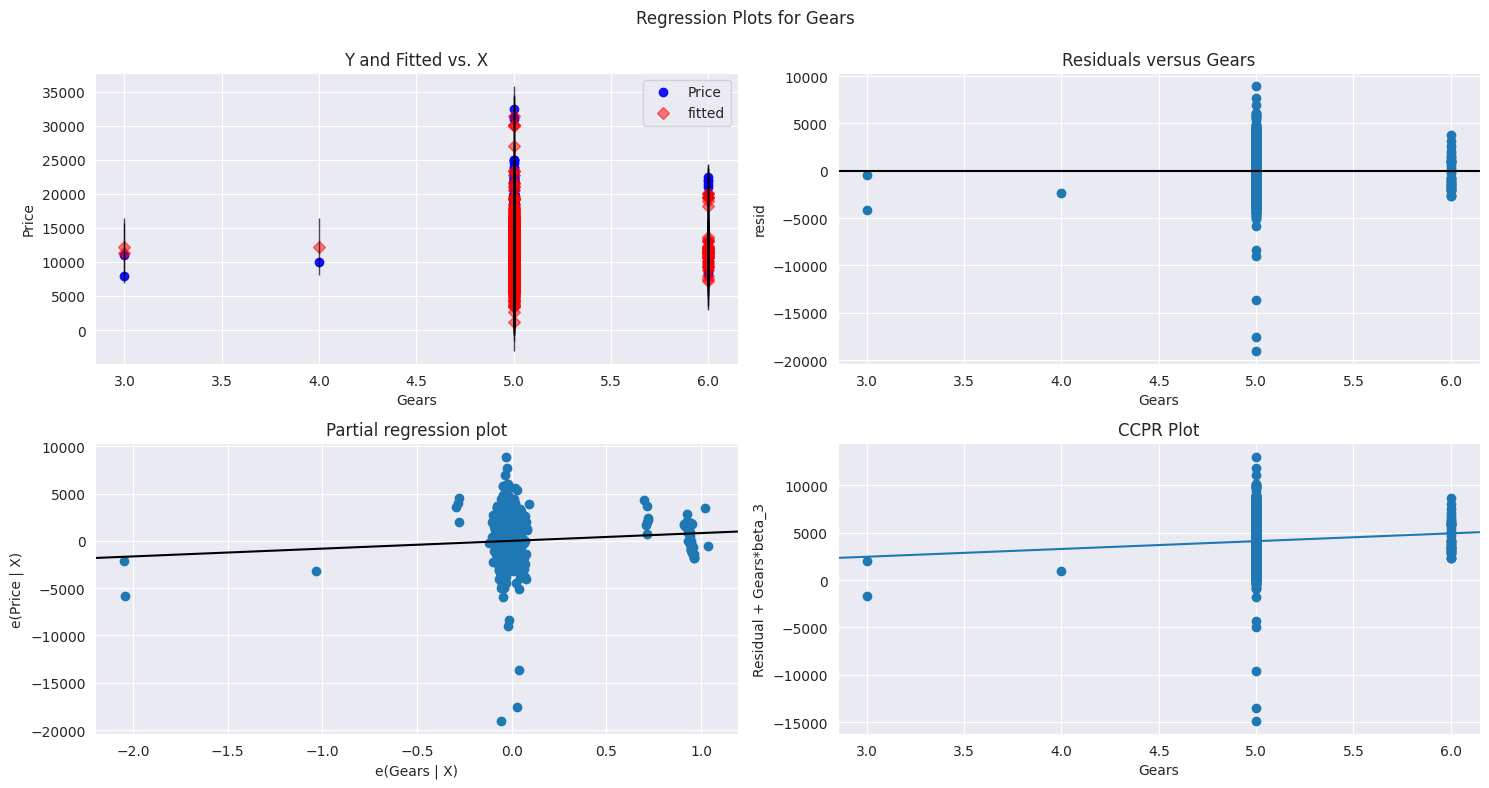

In [23]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'Gears', fig=fig)
plt.show()

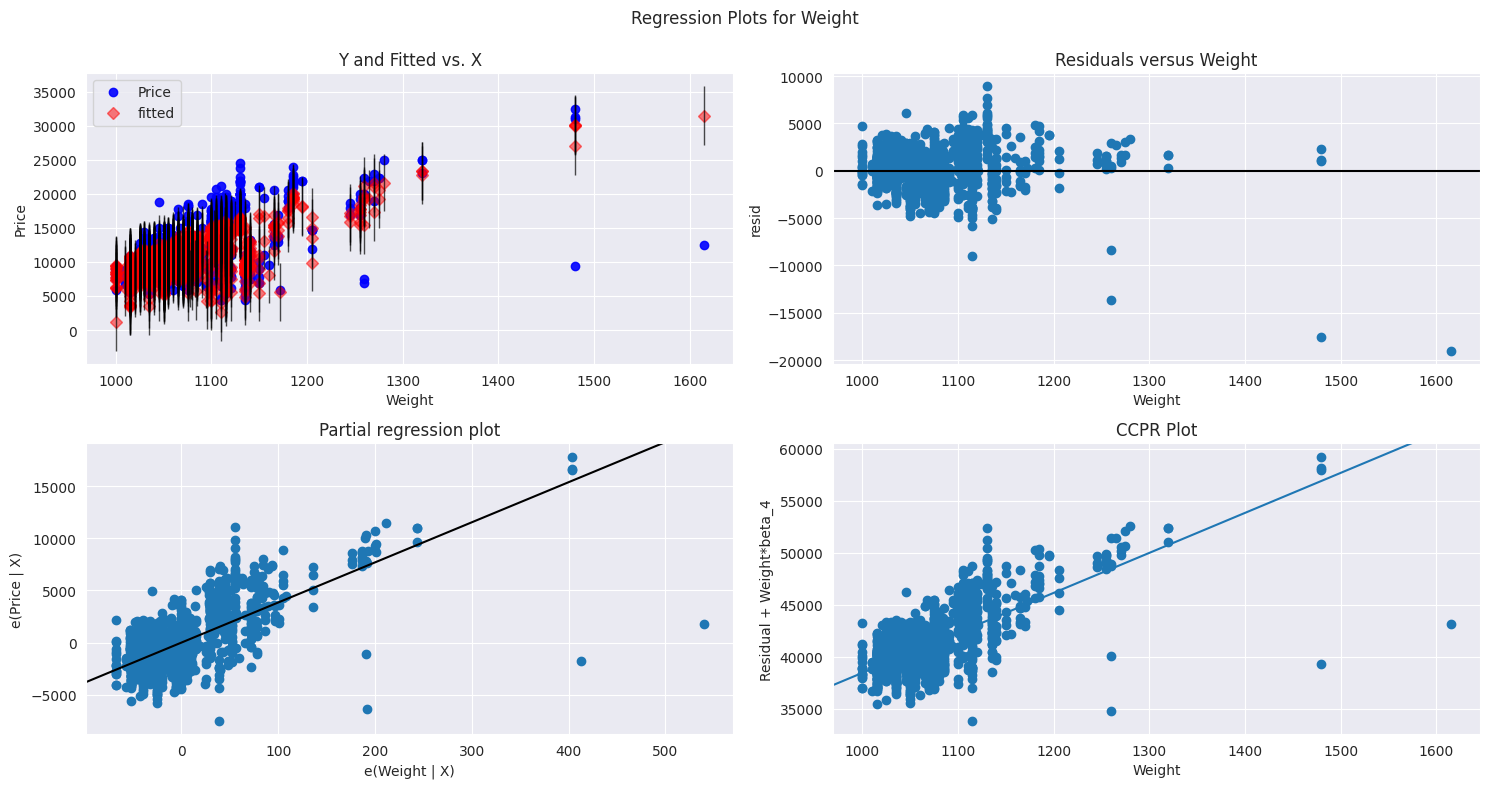

In [24]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'Weight', fig=fig)
plt.show()

In [25]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

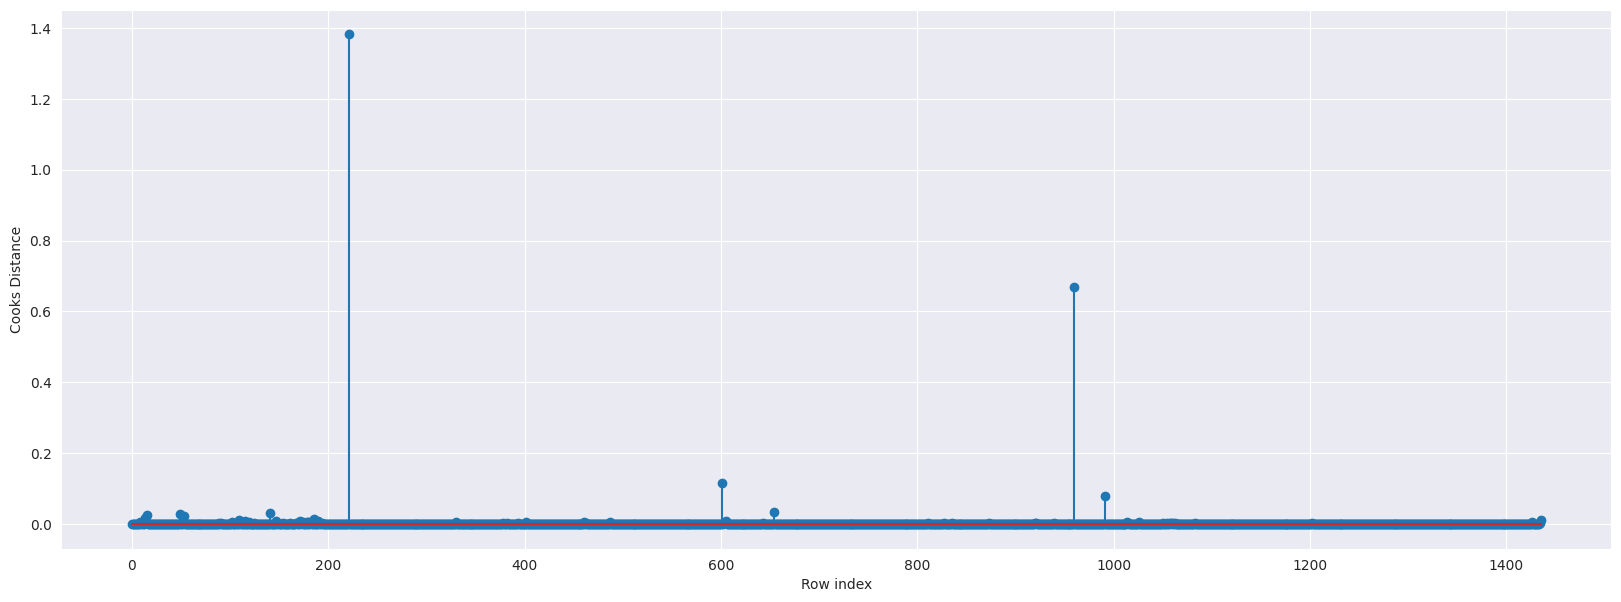

In [26]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(toyoto)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()